In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
from epi.normalizing_flows import ConditionedNormFlow
import matplotlib.pyplot as plt
import time

In [2]:
# Generate data, and keep ground truth theta
def linear2D_eig_stochastic(theta, sigma, N):
    tau = 1.0
    C = np.reshape(theta, (2,2)) / tau
    x = np.zeros((N, 2))
    for i in range(N):
        epsilon = np.random.normal(0., sigma, (2,2))
        eigs = np.linalg.eigvals(C + epsilon)
        eig1, eig2 = eigs[0], eigs[1]
        eig1_r = np.real(eig1)
        eig1_i = np.imag(eig1)
        eig2_r = np.real(eig2)
        eig2_i = np.imag(eig2)
        if eig1_r >= eig2_r:
            real_lambda = eig1_r
        else:
            real_lambda = eig2_r

        if eig1_i >= eig2_i:
            imag_lambda = eig1_i

        x[i,:] = np.array([real_lambda, imag_lambda])
    return x

def x_tf_input(x):
    N, D_x = x.shape
    return tf.constant(np.reshape(x, (1, N*D_x)), tf.float32)

theta = np.array([0., 2., -2., 0.])
sigma = 0.01
N = 10
x0 = linear2D_eig_stochastic(theta, sigma, N)
x0_tf = x_tf_input(x0)
m = np.prod(x0.shape)
print(x0)

[[ 5.40605215e-03  1.99524473e+00]
 [ 7.77142612e-04  1.99847160e+00]
 [-1.73215963e-03  1.99738664e+00]
 [ 1.80704902e-03  1.99989963e+00]
 [ 6.36090361e-03  1.99996898e+00]
 [ 2.91307955e-04  1.99390814e+00]
 [ 6.23311859e-03  1.99966079e+00]
 [-5.67509826e-03  2.00439245e+00]
 [ 4.38298839e-03  1.99905204e+00]
 [ 6.89657513e-03  2.00093602e+00]]


Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
`AffineScalar` bijector is deprecated; please use `tfb.Shift(loc)(tfb.Scale(...))` instead.


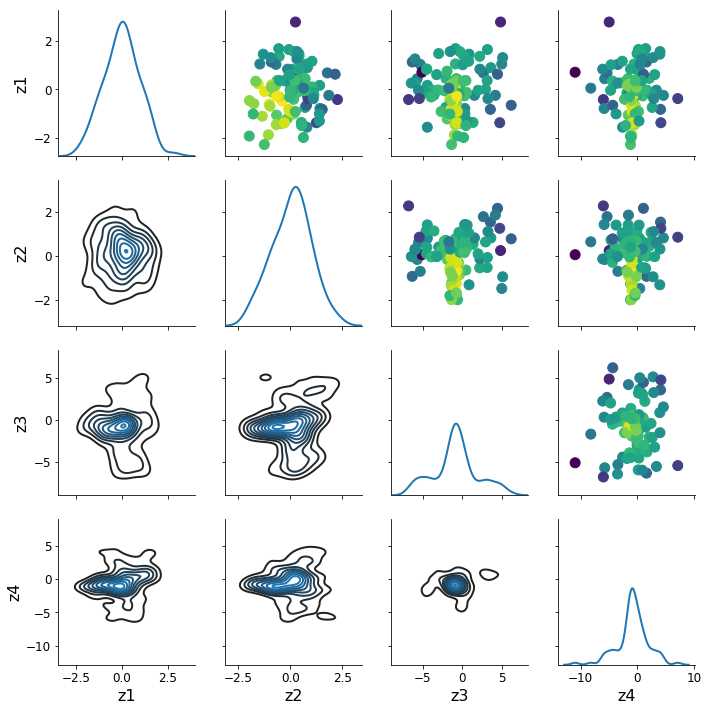

In [3]:
N_theta = 20
nf  = ConditionedNormFlow(4, 1, 7)
# run the network once
nf.plot_dist(N=100, x_data=x0_tf)

In [4]:
def SNPE_sample_prior(r, N_theta, nf, x0):
    if (r==1):
        print("sampling from prior!")
        theta = np.random.uniform(-5., 5., (N_theta, 4)).astype(np.float32)
        return theta, (1./(10.**4)*np.ones((N_theta,))).astype(np.float32)
    else:
        print("sampling from posterior!")
        theta = nf(N_theta, x_data=x0).numpy()
        log_prob = nf.log_prob(theta, x_data=x0).numpy()
        return theta, np.exp(log_prob)

sampling from prior!
0 loss 12179.67 time 72.21809315681458
1 loss 11290.756 time 0.03189706802368164
2 loss 11147.508 time 0.03114008903503418
3 loss 10916.443 time 0.03130292892456055
4 loss 10798.879 time 0.0313410758972168
5 loss 10693.174 time 0.03103327751159668
6 loss 10436.676 time 0.032195091247558594
7 loss 9919.99 time 0.03610110282897949
8 loss 9635.375 time 0.0366971492767334
9 loss 8994.436 time 0.03317999839782715
10 loss 9101.55 time 0.031160831451416016
11 loss 8648.661 time 0.03133511543273926
12 loss 8419.257 time 0.030476808547973633
13 loss 8277.777 time 0.030953168869018555
14 loss 8042.2026 time 0.03419899940490723
15 loss 7720.8657 time 0.03242683410644531
16 loss 7528.7295 time 0.03206276893615723
17 loss 7520.777 time 0.03278207778930664
18 loss 7566.93 time 0.03735208511352539
19 loss 7607.354 time 0.03201889991760254
20 loss 7610.363 time 0.031091928482055664
21 loss 7576.713 time 0.03862285614013672
22 loss 7532.9146 time 0.03364419937133789
23 loss 7499.25

194 loss 6461.3115 time 0.03137087821960449
195 loss 6461.1255 time 0.03316617012023926
196 loss 6460.94 time 0.03135800361633301
197 loss 6460.756 time 0.02914881706237793
198 loss 6460.5713 time 0.029563188552856445
199 loss 6460.3877 time 0.03024005889892578
200 loss 6460.205 time 0.029931068420410156
201 loss 6460.0215 time 0.03132486343383789
202 loss 6459.8384 time 0.03177189826965332
203 loss 6459.655 time 0.030260086059570312
204 loss 6459.47 time 0.029719114303588867
205 loss 6459.2847 time 0.03360271453857422
206 loss 6459.0977 time 0.029454946517944336
207 loss 6458.908 time 0.0297698974609375
208 loss 6458.717 time 0.03185009956359863
209 loss 6458.5205 time 0.03115701675415039
210 loss 6458.3213 time 0.029597043991088867
211 loss 6458.1147 time 0.029819965362548828
212 loss 6457.903 time 0.0291748046875
213 loss 6457.681 time 0.029500961303710938
214 loss 6457.451 time 0.030215024948120117
215 loss 6457.2104 time 0.030859947204589844
216 loss 6456.96 time 0.030632019042968

383 loss 4820.9326 time 0.03168511390686035
384 loss 4820.427 time 0.03176593780517578
385 loss 4820.166 time 0.0296938419342041
386 loss 4820.024 time 0.029983043670654297
387 loss 4819.9395 time 0.02974224090576172
388 loss 4819.8794 time 0.029518842697143555
389 loss 4819.8306 time 0.029348134994506836
390 loss 4819.782 time 0.0310819149017334
391 loss 4819.7285 time 0.03157377243041992
392 loss 4819.6655 time 0.031294822692871094
393 loss 4819.5894 time 0.029767274856567383
394 loss 4819.4995 time 0.029712915420532227
395 loss 4819.393 time 0.029918909072875977
396 loss 4819.27 time 0.029575109481811523
397 loss 4819.1274 time 0.03144097328186035
398 loss 4818.96 time 0.031992197036743164
399 loss 4818.757 time 0.0298311710357666
400 loss 4818.502 time 0.03061819076538086
401 loss 4818.164 time 0.030591964721679688
402 loss 4817.6836 time 0.032942771911621094
403 loss 4816.94 time 0.029901742935180664
404 loss 4815.647 time 0.031131982803344727
405 loss 4812.9893 time 0.03083205223

572 loss 4404.96 time 0.03140974044799805
573 loss 4404.9453 time 0.03175783157348633
574 loss 4404.929 time 0.030286073684692383
575 loss 4404.914 time 0.02987813949584961
576 loss 4404.898 time 0.030829191207885742
577 loss 4404.883 time 0.02964305877685547
578 loss 4404.8677 time 0.029159069061279297
579 loss 4404.852 time 0.030920028686523438
580 loss 4404.837 time 0.030310869216918945
581 loss 4404.8223 time 0.029347658157348633
582 loss 4404.8076 time 0.03034234046936035
583 loss 4404.793 time 0.0293271541595459
584 loss 4404.778 time 0.029992103576660156
585 loss 4404.763 time 0.029459238052368164
586 loss 4404.7485 time 0.03068065643310547
587 loss 4404.7334 time 0.031203031539916992
588 loss 4404.719 time 0.0291750431060791
589 loss 4404.705 time 0.029139995574951172
590 loss 4404.691 time 0.029425859451293945
591 loss 4404.677 time 0.029855012893676758
592 loss 4404.662 time 0.029314041137695312
593 loss 4404.648 time 0.030864953994750977
594 loss 4404.6343 time 0.03144335746

761 loss 4401.776 time 0.039238929748535156
762 loss 4401.7627 time 0.03915691375732422
763 loss 4401.75 time 0.033422231674194336
764 loss 4401.7363 time 0.029346704483032227
765 loss 4401.7236 time 0.02909111976623535
766 loss 4401.711 time 0.029722213745117188
767 loss 4401.6978 time 0.029681921005249023
768 loss 4401.6846 time 0.031291961669921875
769 loss 4401.671 time 0.03080010414123535
770 loss 4401.658 time 0.03008580207824707
771 loss 4401.6436 time 0.02995610237121582
772 loss 4401.6294 time 0.0296938419342041
773 loss 4401.615 time 0.029248952865600586
774 loss 4401.6 time 0.03032207489013672
775 loss 4401.5854 time 0.03159308433532715
776 loss 4401.57 time 0.03031611442565918
777 loss 4401.5537 time 0.029713869094848633
778 loss 4401.537 time 0.02948594093322754
779 loss 4401.5205 time 0.029153108596801758
780 loss 4401.503 time 0.028879880905151367
781 loss 4401.4844 time 0.03008580207824707
782 loss 4401.465 time 0.030363082885742188
783 loss 4401.4443 time 0.03080511093

951 loss 4398.5737 time 0.03444480895996094
952 loss 4398.5684 time 0.03406095504760742
953 loss 4398.5645 time 0.03348588943481445
954 loss 4398.5596 time 0.03365516662597656
955 loss 4398.5557 time 0.032755136489868164
956 loss 4398.551 time 0.03275299072265625
957 loss 4398.547 time 0.03370189666748047
958 loss 4398.542 time 0.03705000877380371
959 loss 4398.5376 time 0.03412795066833496
960 loss 4398.533 time 0.03391003608703613
961 loss 4398.529 time 0.03284811973571777
962 loss 4398.5244 time 0.031157970428466797
963 loss 4398.52 time 0.03190207481384277
964 loss 4398.5156 time 0.03206920623779297
965 loss 4398.5107 time 0.03589916229248047
966 loss 4398.507 time 0.03433084487915039
967 loss 4398.5024 time 0.03360795974731445
968 loss 4398.498 time 0.032353878021240234
969 loss 4398.4937 time 0.0325620174407959
970 loss 4398.4893 time 0.032338857650756836
971 loss 4398.4844 time 0.031951904296875
972 loss 4398.48 time 0.03493475914001465
973 loss 4398.476 time 0.03403782844543457

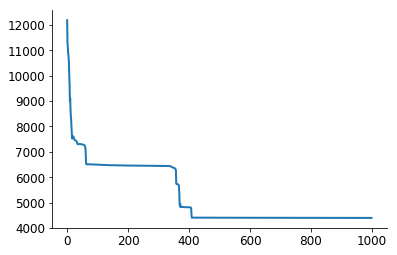

<Figure size 432x288 with 0 Axes>

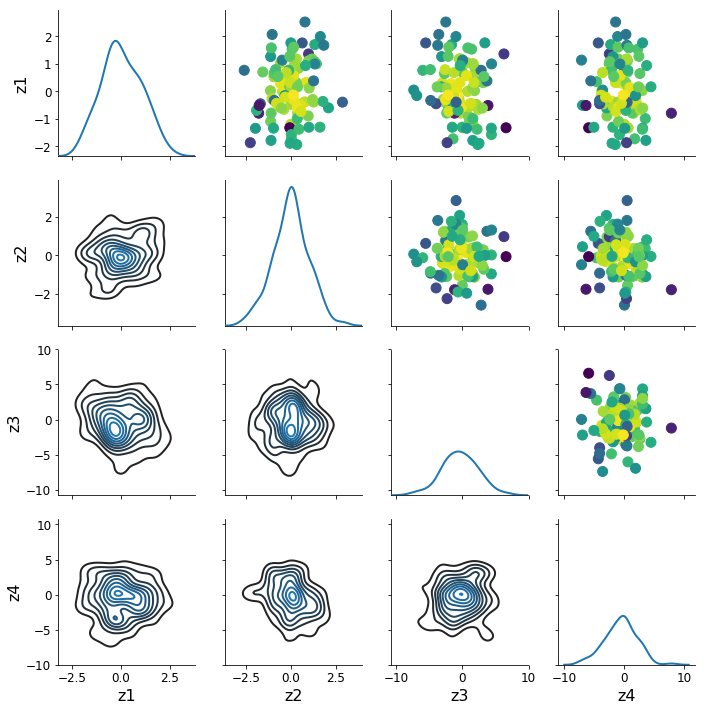

sampling from posterior!
0 loss 26.40649 time 0.032446861267089844
1 loss 26.406334 time 0.029687166213989258
2 loss 26.405487 time 0.030081748962402344
3 loss 26.40402 time 0.029296875
4 loss 26.401993 time 0.0315091609954834
5 loss 26.39945 time 0.027919769287109375
6 loss 26.39645 time 0.02951192855834961
7 loss 26.393023 time 0.030189990997314453
8 loss 26.38921 time 0.029376983642578125
9 loss 26.385044 time 0.029773950576782227
10 loss 26.380554 time 0.030740022659301758
11 loss 26.375767 time 0.03197026252746582
12 loss 26.370712 time 0.030991792678833008
13 loss 26.365414 time 0.031074047088623047
14 loss 26.359894 time 0.030818700790405273
15 loss 26.354174 time 0.030363798141479492
16 loss 26.348282 time 0.029022932052612305
17 loss 26.342234 time 0.031343936920166016
18 loss 26.336056 time 0.03046894073486328
19 loss 26.329771 time 0.030213117599487305
20 loss 26.323393 time 0.030677080154418945
21 loss 26.316952 time 0.029278039932250977
22 loss 26.310463 time 0.02948999404

192 loss 26.03691 time 0.0305788516998291
193 loss 26.036442 time 0.03108811378479004
194 loss 26.035978 time 0.02996516227722168
195 loss 26.035511 time 0.029469013214111328
196 loss 26.035051 time 0.03093695640563965
197 loss 26.034588 time 0.030303955078125
198 loss 26.034128 time 0.030313968658447266
199 loss 26.033669 time 0.031212806701660156
200 loss 26.033213 time 0.032148122787475586
201 loss 26.032757 time 0.03194594383239746
202 loss 26.032299 time 0.02949810028076172
203 loss 26.031845 time 0.029480934143066406
204 loss 26.031393 time 0.029720067977905273
205 loss 26.030943 time 0.029797077178955078
206 loss 26.030489 time 0.032421112060546875
207 loss 26.03004 time 0.03098320960998535
208 loss 26.029593 time 0.029373884201049805
209 loss 26.029146 time 0.02945089340209961
210 loss 26.028698 time 0.02895069122314453
211 loss 26.028254 time 0.02902817726135254
212 loss 26.02781 time 0.02967214584350586
213 loss 26.027367 time 0.031051158905029297
214 loss 26.026926 time 0.03

381 loss 25.962523 time 0.030577898025512695
382 loss 25.962173 time 0.030867338180541992
383 loss 25.961824 time 0.030057907104492188
384 loss 25.961475 time 0.0298612117767334
385 loss 25.961126 time 0.029655933380126953
386 loss 25.96078 time 0.030927181243896484
387 loss 25.96043 time 0.03008413314819336
388 loss 25.960087 time 0.03242015838623047
389 loss 25.959738 time 0.03127098083496094
390 loss 25.95939 time 0.029629945755004883
391 loss 25.959045 time 0.030653953552246094
392 loss 25.958698 time 0.03053593635559082
393 loss 25.958351 time 0.02850484848022461
394 loss 25.958006 time 0.029613971710205078
395 loss 25.95766 time 0.03157973289489746
396 loss 25.957315 time 0.032028913497924805
397 loss 25.956968 time 0.03004312515258789
398 loss 25.956625 time 0.03221702575683594
399 loss 25.95628 time 0.02951502799987793
400 loss 25.955936 time 0.02919292449951172
401 loss 25.955591 time 0.02921319007873535
402 loss 25.955248 time 0.031134843826293945
403 loss 25.954903 time 0.03

572 loss 25.899149 time 0.030382156372070312
573 loss 25.898829 time 0.032301902770996094
574 loss 25.898508 time 0.029658079147338867
575 loss 25.898186 time 0.029671192169189453
576 loss 25.897865 time 0.029310941696166992
577 loss 25.897543 time 0.029545068740844727
578 loss 25.89722 time 0.029814958572387695
579 loss 25.8969 time 0.030364036560058594
580 loss 25.89658 time 0.032173871994018555
581 loss 25.89626 time 0.031752824783325195
582 loss 25.895935 time 0.0318300724029541
583 loss 25.895617 time 0.029949188232421875
584 loss 25.895294 time 0.029435157775878906
585 loss 25.894974 time 0.029275894165039062
586 loss 25.894655 time 0.03084278106689453
587 loss 25.894333 time 0.030249834060668945
588 loss 25.894009 time 0.029284954071044922
589 loss 25.893688 time 0.029191970825195312
590 loss 25.89337 time 0.028710126876831055
591 loss 25.893047 time 0.029978036880493164
592 loss 25.892729 time 0.029278039932250977
593 loss 25.892408 time 0.0296628475189209
594 loss 25.892086 ti

762 loss 25.839813 time 0.030249834060668945
763 loss 25.839518 time 0.032483816146850586
764 loss 25.839226 time 0.029191017150878906
765 loss 25.838932 time 0.029826879501342773
766 loss 25.838638 time 0.029118061065673828
767 loss 25.838345 time 0.029575824737548828
768 loss 25.83805 time 0.028745174407958984
769 loss 25.837759 time 0.03188300132751465
770 loss 25.837467 time 0.03094792366027832
771 loss 25.837173 time 0.030336856842041016
772 loss 25.836884 time 0.030254840850830078
773 loss 25.836592 time 0.02856612205505371
774 loss 25.8363 time 0.030340909957885742
775 loss 25.83601 time 0.029881715774536133
776 loss 25.835722 time 0.031009197235107422
777 loss 25.83543 time 0.03114795684814453
778 loss 25.83514 time 0.029909849166870117
779 loss 25.834848 time 0.030607938766479492
780 loss 25.83456 time 0.03052520751953125
781 loss 25.834274 time 0.03000617027282715
782 loss 25.833984 time 0.02896738052368164
783 loss 25.833696 time 0.03145599365234375
784 loss 25.83341 time 0.

952 loss 25.790329 time 0.032469987869262695
953 loss 25.790106 time 0.028397083282470703
954 loss 25.789879 time 0.027209997177124023
955 loss 25.789654 time 0.02982497215270996
956 loss 25.78943 time 0.031526803970336914
957 loss 25.789207 time 0.03241705894470215
958 loss 25.788984 time 0.029882192611694336
959 loss 25.788761 time 0.03178715705871582
960 loss 25.788536 time 0.03207206726074219
961 loss 25.788317 time 0.029623031616210938
962 loss 25.788094 time 0.031035900115966797
963 loss 25.78787 time 0.02927398681640625
964 loss 25.787651 time 0.029774904251098633
965 loss 25.78743 time 0.029239892959594727
966 loss 25.787207 time 0.0318450927734375
967 loss 25.786987 time 0.03130817413330078
968 loss 25.786766 time 0.02936720848083496
969 loss 25.786547 time 0.02957010269165039
970 loss 25.78633 time 0.02954697608947754
971 loss 25.78611 time 0.03017902374267578
972 loss 25.785889 time 0.030535221099853516
973 loss 25.78567 time 0.030505895614624023
974 loss 25.785454 time 0.03

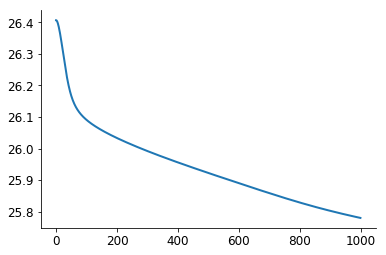

<Figure size 432x288 with 0 Axes>

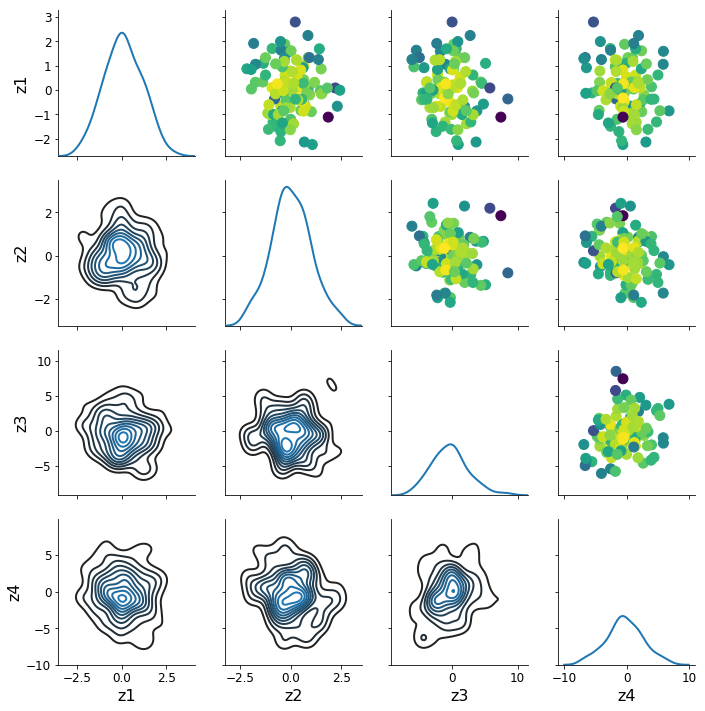

sampling from posterior!
0 loss 179.55705 time 0.03305983543395996
1 loss 179.55228 time 0.03028082847595215
2 loss 179.54349 time 0.030572891235351562
3 loss 179.53116 time 0.03170895576477051
4 loss 179.51578 time 0.03003406524658203
5 loss 179.49782 time 0.03022003173828125
6 loss 179.4777 time 0.030086278915405273
7 loss 179.45601 time 0.029448986053466797
8 loss 179.43318 time 0.02974414825439453
9 loss 179.4098 time 0.029465198516845703
10 loss 179.38637 time 0.03053426742553711
11 loss 179.36345 time 0.03205704689025879
12 loss 179.34155 time 0.030495882034301758
13 loss 179.32109 time 0.02990412712097168
14 loss 179.3025 time 0.02982306480407715
15 loss 179.28598 time 0.02953791618347168
16 loss 179.27159 time 0.029466867446899414
17 loss 179.25928 time 0.03077411651611328
18 loss 179.2489 time 0.031523704528808594
19 loss 179.24023 time 0.03272294998168945
20 loss 179.23302 time 0.03166794776916504
21 loss 179.227 time 0.029367923736572266
22 loss 179.22194 time 0.028955936431

192 loss 179.09973 time 0.03132796287536621
193 loss 179.0995 time 0.03159904479980469
194 loss 179.09926 time 0.03009200096130371
195 loss 179.099 time 0.029675722122192383
196 loss 179.09874 time 0.030091047286987305
197 loss 179.09851 time 0.029293060302734375
198 loss 179.09828 time 0.030143022537231445
199 loss 179.09802 time 0.030724763870239258
200 loss 179.0978 time 0.030966997146606445
201 loss 179.09755 time 0.02960491180419922
202 loss 179.0973 time 0.030160903930664062
203 loss 179.09706 time 0.029597043991088867
204 loss 179.09685 time 0.028831005096435547
205 loss 179.09662 time 0.030147790908813477
206 loss 179.09637 time 0.03167319297790527
207 loss 179.09613 time 0.030110836029052734
208 loss 179.0959 time 0.030111312866210938
209 loss 179.09567 time 0.029124021530151367
210 loss 179.09544 time 0.029329299926757812
211 loss 179.09521 time 0.029526233673095703
212 loss 179.09497 time 0.030239105224609375
213 loss 179.09476 time 0.03143596649169922
214 loss 179.09454 tim

382 loss 179.06468 time 0.03379011154174805
383 loss 179.06453 time 0.030842065811157227
384 loss 179.06438 time 0.030621767044067383
385 loss 179.06422 time 0.030766963958740234
386 loss 179.0641 time 0.03000497817993164
387 loss 179.06393 time 0.02972412109375
388 loss 179.06377 time 0.02986598014831543
389 loss 179.06364 time 0.032003164291381836
390 loss 179.06348 time 0.03266096115112305
391 loss 179.06335 time 0.031150102615356445
392 loss 179.06319 time 0.029296875
393 loss 179.06305 time 0.029808759689331055
394 loss 179.0629 time 0.02948307991027832
395 loss 179.06274 time 0.031147003173828125
396 loss 179.06259 time 0.03248786926269531
397 loss 179.06244 time 0.033599138259887695
398 loss 179.06232 time 0.03023982048034668
399 loss 179.06216 time 0.030376195907592773
400 loss 179.06201 time 0.030746936798095703
401 loss 179.06189 time 0.030425071716308594
402 loss 179.06174 time 0.02993011474609375
403 loss 179.06158 time 0.03220486640930176
404 loss 179.06143 time 0.03109073

568 loss 179.03894 time 0.032174110412597656
569 loss 179.0388 time 0.03710222244262695
570 loss 179.03868 time 0.03012394905090332
571 loss 179.03856 time 0.029246091842651367
572 loss 179.0384 time 0.029014110565185547
573 loss 179.03827 time 0.03041386604309082
574 loss 179.03813 time 0.030694961547851562
575 loss 179.038 time 0.03199005126953125
576 loss 179.03787 time 0.031301021575927734
577 loss 179.03773 time 0.029902935028076172
578 loss 179.0376 time 0.029369831085205078
579 loss 179.03748 time 0.029819965362548828
580 loss 179.03735 time 0.029986858367919922
581 loss 179.03722 time 0.030794620513916016
582 loss 179.03708 time 0.030853748321533203
583 loss 179.03696 time 0.031581878662109375
584 loss 179.03683 time 0.03093886375427246
585 loss 179.03668 time 0.029822826385498047
586 loss 179.03656 time 0.030629873275756836
587 loss 179.03642 time 0.029284954071044922
588 loss 179.03629 time 0.029774188995361328
589 loss 179.03615 time 0.032695770263671875
590 loss 179.03601 t

758 loss 179.01349 time 0.03226184844970703
759 loss 179.01334 time 0.03299903869628906
760 loss 179.01321 time 0.02978205680847168
761 loss 179.01305 time 0.030145883560180664
762 loss 179.01292 time 0.029784679412841797
763 loss 179.01279 time 0.03348493576049805
764 loss 179.01263 time 0.03157210350036621
765 loss 179.0125 time 0.03176712989807129
766 loss 179.01236 time 0.0314788818359375
767 loss 179.01222 time 0.02993631362915039
768 loss 179.01208 time 0.030087947845458984
769 loss 179.01195 time 0.030139923095703125
770 loss 179.01181 time 0.030656099319458008
771 loss 179.01166 time 0.030843019485473633
772 loss 179.01154 time 0.03161501884460449
773 loss 179.0114 time 0.0317840576171875
774 loss 179.01126 time 0.02954697608947754
775 loss 179.01111 time 0.03115081787109375
776 loss 179.01099 time 0.02956223487854004
777 loss 179.01083 time 0.03048086166381836
778 loss 179.01068 time 0.030304908752441406
779 loss 179.01056 time 0.032035112380981445
780 loss 179.01042 time 0.03

947 loss 178.98521 time 0.03303980827331543
948 loss 178.98505 time 0.03183627128601074
949 loss 178.9849 time 0.03011918067932129
950 loss 178.98474 time 0.03175091743469238
951 loss 178.98457 time 0.030200958251953125
952 loss 178.9844 time 0.03002476692199707
953 loss 178.98424 time 0.0299530029296875
954 loss 178.98407 time 0.03495287895202637
955 loss 178.9839 time 0.03352618217468262
956 loss 178.98372 time 0.03422188758850098
957 loss 178.98355 time 0.031358957290649414
958 loss 178.98338 time 0.03050065040588379
959 loss 178.98323 time 0.03050518035888672
960 loss 178.98306 time 0.029538869857788086
961 loss 178.9829 time 0.0329890251159668
962 loss 178.98273 time 0.03198385238647461
963 loss 178.98254 time 0.031094074249267578
964 loss 178.98239 time 0.029923200607299805
965 loss 178.98222 time 0.0303192138671875
966 loss 178.98206 time 0.03242993354797363
967 loss 178.98189 time 0.02998208999633789
968 loss 178.9817 time 0.03121185302734375
969 loss 178.98154 time 0.031333684

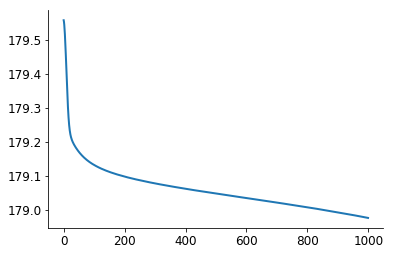

<Figure size 432x288 with 0 Axes>

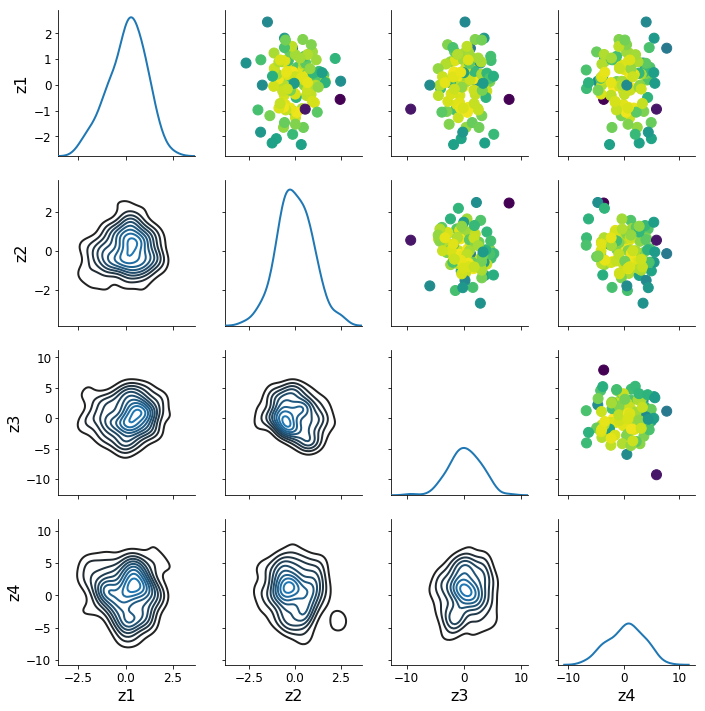

sampling from posterior!
0 loss 37.76078 time 0.03195595741271973
1 loss 37.759 time 0.03230690956115723
2 loss 37.755924 time 0.032338857650756836
3 loss 37.75174 time 0.031800031661987305
4 loss 37.74661 time 0.03142380714416504
5 loss 37.740692 time 0.030048847198486328
6 loss 37.734154 time 0.029324054718017578
7 loss 37.727127 time 0.02979302406311035
8 loss 37.719746 time 0.0297701358795166
9 loss 37.712135 time 0.029402732849121094
10 loss 37.704384 time 0.03158998489379883
11 loss 37.696587 time 0.031365156173706055
12 loss 37.688828 time 0.029690265655517578
13 loss 37.681168 time 0.029956817626953125
14 loss 37.67365 time 0.02992987632751465
15 loss 37.666325 time 0.029539108276367188
16 loss 37.659218 time 0.030217885971069336
17 loss 37.652363 time 0.03207516670227051
18 loss 37.64577 time 0.0328981876373291
19 loss 37.639454 time 0.029947996139526367
20 loss 37.63342 time 0.02993631362915039
21 loss 37.627666 time 0.029906272888183594
22 loss 37.622185 time 0.0310859680175

191 loss 37.49648 time 0.03294181823730469
192 loss 37.496346 time 0.030999183654785156
193 loss 37.496216 time 0.03148388862609863
194 loss 37.496086 time 0.03303980827331543
195 loss 37.495956 time 0.03126978874206543
196 loss 37.49583 time 0.029933929443359375
197 loss 37.495705 time 0.030089139938354492
198 loss 37.49558 time 0.03205704689025879
199 loss 37.495453 time 0.03126692771911621
200 loss 37.49533 time 0.030843257904052734
201 loss 37.495205 time 0.031156063079833984
202 loss 37.49508 time 0.030525922775268555
203 loss 37.49496 time 0.030858993530273438
204 loss 37.494835 time 0.03057098388671875
205 loss 37.494713 time 0.03206300735473633
206 loss 37.4946 time 0.03106093406677246
207 loss 37.494473 time 0.029681921005249023
208 loss 37.494358 time 0.03094792366027832
209 loss 37.49424 time 0.030452966690063477
210 loss 37.494114 time 0.03046894073486328
211 loss 37.494 time 0.03018927574157715
212 loss 37.49388 time 0.03354787826538086
213 loss 37.493763 time 0.0315661430

380 loss 37.47851 time 0.032515764236450195
381 loss 37.47843 time 0.03280305862426758
382 loss 37.478355 time 0.029807090759277344
383 loss 37.47828 time 0.030638933181762695
384 loss 37.4782 time 0.029927730560302734
385 loss 37.47812 time 0.029839038848876953
386 loss 37.47804 time 0.03035283088684082
387 loss 37.47797 time 0.03175687789916992
388 loss 37.477886 time 0.03678393363952637
389 loss 37.47781 time 0.0311129093170166
390 loss 37.477734 time 0.03045797348022461
391 loss 37.477654 time 0.029429912567138672
392 loss 37.477577 time 0.030587196350097656
393 loss 37.4775 time 0.030262231826782227
394 loss 37.47742 time 0.033004045486450195
395 loss 37.477345 time 0.03109598159790039
396 loss 37.477264 time 0.029792070388793945
397 loss 37.47719 time 0.03042888641357422
398 loss 37.477108 time 0.030249834060668945
399 loss 37.47703 time 0.030966758728027344
400 loss 37.476955 time 0.03022909164428711
401 loss 37.47688 time 0.03127408027648926
402 loss 37.476803 time 0.0311789512

568 loss 37.464165 time 0.03255414962768555
569 loss 37.464085 time 0.031120777130126953
570 loss 37.464012 time 0.02993321418762207
571 loss 37.46393 time 0.02933812141418457
572 loss 37.463852 time 0.03066086769104004
573 loss 37.463776 time 0.030868053436279297
574 loss 37.463696 time 0.02957892417907715
575 loss 37.46362 time 0.031633853912353516
576 loss 37.46354 time 0.03092503547668457
577 loss 37.46346 time 0.02991008758544922
578 loss 37.463383 time 0.030230998992919922
579 loss 37.463303 time 0.032301902770996094
580 loss 37.463223 time 0.03169584274291992
581 loss 37.463146 time 0.03017878532409668
582 loss 37.46307 time 0.03342080116271973
583 loss 37.46299 time 0.030757904052734375
584 loss 37.46291 time 0.02989792823791504
585 loss 37.462833 time 0.03122711181640625
586 loss 37.462757 time 0.03003978729248047
587 loss 37.462673 time 0.029680967330932617
588 loss 37.462593 time 0.030353784561157227
589 loss 37.462517 time 0.0325779914855957
590 loss 37.46244 time 0.0321159

758 loss 37.4476 time 0.03179025650024414
759 loss 37.447502 time 0.03295588493347168
760 loss 37.4474 time 0.029653072357177734
761 loss 37.447296 time 0.0308072566986084
762 loss 37.447193 time 0.03353404998779297
763 loss 37.44709 time 0.03090810775756836
764 loss 37.446983 time 0.02955317497253418
765 loss 37.44688 time 0.03140401840209961
766 loss 37.446777 time 0.0325779914855957
767 loss 37.44667 time 0.03421282768249512
768 loss 37.446564 time 0.03326106071472168
769 loss 37.44646 time 0.0329742431640625
770 loss 37.446358 time 0.0340120792388916
771 loss 37.44625 time 0.0333099365234375
772 loss 37.44614 time 0.03693795204162598
773 loss 37.446037 time 0.03440093994140625
774 loss 37.44593 time 0.03311014175415039
775 loss 37.445824 time 0.033383846282958984
776 loss 37.445713 time 0.03441214561462402
777 loss 37.445606 time 0.03387713432312012
778 loss 37.4455 time 0.03522992134094238
779 loss 37.44539 time 0.03733706474304199
780 loss 37.445282 time 0.03377199172973633
781 l

951 loss 37.408215 time 0.03427910804748535
952 loss 37.407547 time 0.0361940860748291
953 loss 37.406857 time 0.03401899337768555
954 loss 37.40614 time 0.03400111198425293
955 loss 37.405403 time 0.033634185791015625
956 loss 37.40464 time 0.03368496894836426
957 loss 37.40385 time 0.03435397148132324
958 loss 37.40303 time 0.03521084785461426
959 loss 37.40218 time 0.034172773361206055
960 loss 37.4013 time 0.034071922302246094
961 loss 37.400383 time 0.03373908996582031
962 loss 37.39943 time 0.033995866775512695
963 loss 37.398438 time 0.03345608711242676
964 loss 37.397408 time 0.036112070083618164
965 loss 37.39633 time 0.03455615043640137
966 loss 37.395203 time 0.03490614891052246
967 loss 37.394024 time 0.03403592109680176
968 loss 37.39279 time 0.03403186798095703
969 loss 37.391502 time 0.03526878356933594
970 loss 37.390144 time 0.03588509559631348
971 loss 37.38872 time 0.03410506248474121
972 loss 37.387222 time 0.03865313529968262
973 loss 37.385643 time 0.0347421169281

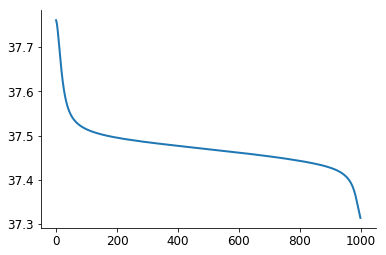

<Figure size 432x288 with 0 Axes>

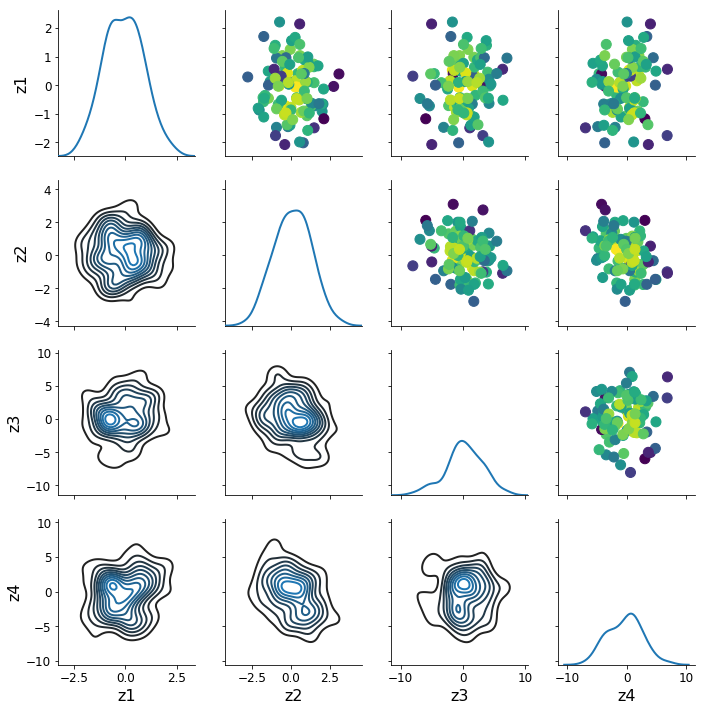

sampling from posterior!
0 loss 42.278984 time 0.03228306770324707
1 loss 42.27594 time 0.030183792114257812
2 loss 42.27283 time 0.030282020568847656
3 loss 42.269653 time 0.03137612342834473
4 loss 42.26642 time 0.031556129455566406
5 loss 42.26314 time 0.0295259952545166
6 loss 42.259823 time 0.029448986053466797
7 loss 42.25647 time 0.029577255249023438
8 loss 42.253086 time 0.029569149017333984
9 loss 42.24968 time 0.030031919479370117
10 loss 42.24625 time 0.03162503242492676
11 loss 42.242817 time 0.03187704086303711
12 loss 42.239372 time 0.02950119972229004
13 loss 42.235924 time 0.030874967575073242
14 loss 42.232475 time 0.02871870994567871
15 loss 42.229027 time 0.029390811920166016
16 loss 42.22559 time 0.03203606605529785
17 loss 42.222164 time 0.03425312042236328
18 loss 42.218746 time 0.03264498710632324
19 loss 42.21536 time 0.029304027557373047
20 loss 42.211975 time 0.029408931732177734
21 loss 42.208626 time 0.02857685089111328
22 loss 42.205296 time 0.0295829772949

190 loss 42.001175 time 0.03431510925292969
191 loss 42.000805 time 0.03644895553588867
192 loss 42.000443 time 0.03392314910888672
193 loss 42.00008 time 0.03461909294128418
194 loss 41.999718 time 0.0336451530456543
195 loss 41.999367 time 0.03335094451904297
196 loss 41.999004 time 0.036081790924072266
197 loss 41.99865 time 0.03792214393615723
198 loss 41.9983 time 0.034544944763183594
199 loss 41.997948 time 0.03326010704040527
200 loss 41.997597 time 0.033387184143066406
201 loss 41.997253 time 0.032128095626831055
202 loss 41.996906 time 0.03315305709838867
203 loss 41.996563 time 0.03432202339172363
204 loss 41.996223 time 0.0359649658203125
205 loss 41.99588 time 0.0333709716796875
206 loss 41.995544 time 0.0339510440826416
207 loss 41.995205 time 0.03306221961975098
208 loss 41.99487 time 0.0353090763092041
209 loss 41.994537 time 0.036376953125
210 loss 41.994205 time 0.032853126525878906
211 loss 41.993866 time 0.03381490707397461
212 loss 41.99354 time 0.03344273567199707


381 loss 38.88473 time 0.033576011657714844
382 loss 38.884373 time 0.0371851921081543
383 loss 38.88401 time 0.034184932708740234
384 loss 38.883644 time 0.033535003662109375
385 loss 38.883278 time 0.034800052642822266
386 loss 38.882904 time 0.03411078453063965
387 loss 38.882538 time 0.03466391563415527
388 loss 38.882164 time 0.035685062408447266
389 loss 38.881794 time 0.03455090522766113
390 loss 38.88142 time 0.03346514701843262
391 loss 38.881046 time 0.03365778923034668
392 loss 38.880672 time 0.034358978271484375
393 loss 38.8803 time 0.03401899337768555
394 loss 38.87993 time 0.0362238883972168
395 loss 38.879562 time 0.03451800346374512
396 loss 38.87919 time 0.03403806686401367
397 loss 38.87882 time 0.03307008743286133
398 loss 38.878456 time 0.033329010009765625
399 loss 38.87809 time 0.034526824951171875
400 loss 38.877724 time 0.037529706954956055
401 loss 38.877365 time 0.03601217269897461
402 loss 38.877 time 0.033941030502319336
403 loss 38.876637 time 0.0333979129

569 loss 38.835938 time 0.03608512878417969
570 loss 38.83577 time 0.0368809700012207
571 loss 38.835594 time 0.03426790237426758
572 loss 38.835423 time 0.033514976501464844
573 loss 38.835255 time 0.03335118293762207
574 loss 38.83508 time 0.03657698631286621
575 loss 38.834908 time 0.0362548828125
576 loss 38.83474 time 0.03648710250854492
577 loss 38.83457 time 0.03408002853393555
578 loss 38.8344 time 0.03520917892456055
579 loss 38.834232 time 0.033982038497924805
580 loss 38.83406 time 0.03354191780090332
581 loss 38.833897 time 0.035429954528808594
582 loss 38.83373 time 0.036396026611328125
583 loss 38.83356 time 0.03396129608154297
584 loss 38.833393 time 0.03379988670349121
585 loss 38.83323 time 0.034208059310913086
586 loss 38.83306 time 0.03373908996582031
587 loss 38.8329 time 0.03480386734008789
588 loss 38.832737 time 0.03613686561584473
589 loss 38.832573 time 0.03351283073425293
590 loss 38.832405 time 0.0344090461730957
591 loss 38.83224 time 0.03557085990905762
592

762 loss 38.808533 time 0.03508138656616211
763 loss 38.808414 time 0.03754615783691406
764 loss 38.808292 time 0.03514289855957031
765 loss 38.80818 time 0.03323698043823242
766 loss 38.80806 time 0.03426098823547363
767 loss 38.807938 time 0.03282618522644043
768 loss 38.807823 time 0.034929752349853516
769 loss 38.8077 time 0.03655123710632324
770 loss 38.807583 time 0.03313708305358887
771 loss 38.807465 time 0.03326678276062012
772 loss 38.807343 time 0.034414052963256836
773 loss 38.807228 time 0.03332972526550293
774 loss 38.80711 time 0.03386497497558594
775 loss 38.80699 time 0.03973507881164551
776 loss 38.806877 time 0.0341949462890625
777 loss 38.806755 time 0.03385591506958008
778 loss 38.806644 time 0.03290605545043945
779 loss 38.806526 time 0.03269195556640625
780 loss 38.806404 time 0.03422689437866211
781 loss 38.806293 time 0.03637504577636719
782 loss 38.806175 time 0.03421807289123535
783 loss 38.806057 time 0.03513598442077637
784 loss 38.805943 time 0.03388094902

954 loss 38.788326 time 0.037735939025878906
955 loss 38.788235 time 0.037322044372558594
956 loss 38.78814 time 0.03612184524536133
957 loss 38.788048 time 0.03626894950866699
958 loss 38.78796 time 0.036315202713012695
959 loss 38.787865 time 0.03634500503540039
960 loss 38.787777 time 0.03847503662109375
961 loss 38.78768 time 0.03650999069213867
962 loss 38.787586 time 0.03565216064453125
963 loss 38.7875 time 0.0369417667388916
964 loss 38.787407 time 0.03728675842285156
965 loss 38.787315 time 0.035798072814941406
966 loss 38.787224 time 0.03994107246398926
967 loss 38.787132 time 0.03594088554382324
968 loss 38.78704 time 0.0358579158782959
969 loss 38.78695 time 0.03704690933227539
970 loss 38.786858 time 0.03576016426086426
971 loss 38.786766 time 0.035809993743896484
972 loss 38.786674 time 0.03794598579406738
973 loss 38.786583 time 0.04021501541137695
974 loss 38.786495 time 0.03654193878173828
975 loss 38.786407 time 0.03608512878417969
976 loss 38.786312 time 0.0355281829

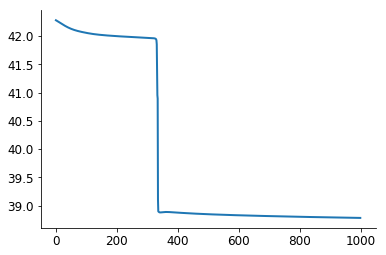

<Figure size 432x288 with 0 Axes>

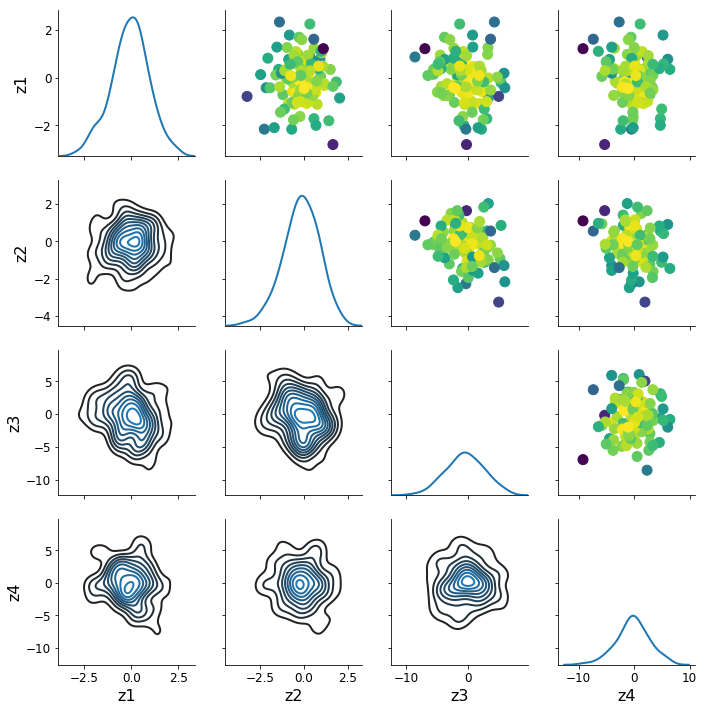

sampling from posterior!
0 loss 21.450775 time 0.03454899787902832
1 loss 21.45004 time 0.03305983543395996
2 loss 21.448837 time 0.03612685203552246
3 loss 21.447254 time 0.03640890121459961
4 loss 21.445385 time 0.03326916694641113
5 loss 21.443314 time 0.033614158630371094
6 loss 21.441118 time 0.03329277038574219
7 loss 21.438866 time 0.0319371223449707
8 loss 21.436607 time 0.0325469970703125
9 loss 21.434385 time 0.03686976432800293
10 loss 21.432224 time 0.03472495079040527
11 loss 21.430147 time 0.03388023376464844
12 loss 21.428164 time 0.03314518928527832
13 loss 21.426277 time 0.03277707099914551
14 loss 21.424488 time 0.03379106521606445
15 loss 21.422794 time 0.033740997314453125
16 loss 21.421192 time 0.035906076431274414
17 loss 21.419676 time 0.033992767333984375
18 loss 21.418232 time 0.035479068756103516
19 loss 21.416864 time 0.04099297523498535
20 loss 21.415564 time 0.03425097465515137
21 loss 21.414322 time 0.03778409957885742
22 loss 21.41313 time 0.0365030765533

189 loss 21.322756 time 0.03791999816894531
190 loss 21.32236 time 0.03768014907836914
191 loss 21.321959 time 0.037286996841430664
192 loss 21.321564 time 0.03843212127685547
193 loss 21.321163 time 0.03652811050415039
194 loss 21.320765 time 0.036863088607788086
195 loss 21.320366 time 0.038327932357788086
196 loss 21.319971 time 0.0365290641784668
197 loss 21.319569 time 0.035334110260009766
198 loss 21.319172 time 0.03633308410644531
199 loss 21.318775 time 0.035902976989746094
200 loss 21.318378 time 0.037734270095825195
201 loss 21.317978 time 0.03797411918640137
202 loss 21.317577 time 0.03587818145751953
203 loss 21.317177 time 0.03611183166503906
204 loss 21.316776 time 0.035336971282958984
205 loss 21.316378 time 0.0354156494140625
206 loss 21.315973 time 0.03604269027709961
207 loss 21.31557 time 0.03943967819213867
208 loss 21.315166 time 0.03766584396362305
209 loss 21.31476 time 0.03655505180358887
210 loss 21.314354 time 0.03628277778625488
211 loss 21.313946 time 0.0358

375 loss 21.26026 time 0.04336714744567871
376 loss 21.259983 time 0.038555145263671875
377 loss 21.259705 time 0.03801274299621582
378 loss 21.259422 time 0.03805804252624512
379 loss 21.25914 time 0.03944897651672363
380 loss 21.258862 time 0.03902697563171387
381 loss 21.25858 time 0.04185295104980469
382 loss 21.258297 time 0.03912782669067383
383 loss 21.258015 time 0.03965401649475098
384 loss 21.25773 time 0.03947114944458008
385 loss 21.257446 time 0.03840517997741699
386 loss 21.25716 time 0.03803586959838867
387 loss 21.256878 time 0.04343295097351074
388 loss 21.256592 time 0.03921389579772949
389 loss 21.256304 time 0.03875374794006348
390 loss 21.256016 time 0.04004383087158203
391 loss 21.255728 time 0.03830981254577637
392 loss 21.255436 time 0.03975701332092285
393 loss 21.255148 time 0.04277205467224121
394 loss 21.254856 time 0.04013800621032715
395 loss 21.25457 time 0.03969407081604004
396 loss 21.254276 time 0.039222002029418945
397 loss 21.253984 time 0.0382540225

564 loss 21.21053 time 0.04566502571105957
565 loss 21.210361 time 0.04613804817199707
566 loss 21.210196 time 0.041654109954833984
567 loss 21.210032 time 0.03926992416381836
568 loss 21.209866 time 0.03879594802856445
569 loss 21.209702 time 0.039137840270996094
570 loss 21.209538 time 0.042157888412475586
571 loss 21.209375 time 0.0385279655456543
572 loss 21.209213 time 0.04085206985473633
573 loss 21.209051 time 0.04326319694519043
574 loss 21.20889 time 0.03908991813659668
575 loss 21.208733 time 0.04275107383728027
576 loss 21.20857 time 0.03872275352478027
577 loss 21.20841 time 0.03924369812011719
578 loss 21.208252 time 0.03913378715515137
579 loss 21.208092 time 0.03904390335083008
580 loss 21.207935 time 0.04326295852661133
581 loss 21.207779 time 0.03865790367126465
582 loss 21.207623 time 0.03925800323486328
583 loss 21.207466 time 0.0403599739074707
584 loss 21.207308 time 0.03932070732116699
585 loss 21.207153 time 0.038681983947753906
586 loss 21.206999 time 0.04455089

755 loss 21.184786 time 0.04110312461853027
756 loss 21.18467 time 0.03872823715209961
757 loss 21.184551 time 0.037557125091552734
758 loss 21.184433 time 0.03704714775085449
759 loss 21.184319 time 0.03633594512939453
760 loss 21.184198 time 0.038533926010131836
761 loss 21.18408 time 0.039672136306762695
762 loss 21.183966 time 0.038372039794921875
763 loss 21.183847 time 0.03800606727600098
764 loss 21.183733 time 0.038146018981933594
765 loss 21.183615 time 0.03792524337768555
766 loss 21.1835 time 0.036930084228515625
767 loss 21.183382 time 0.04179191589355469
768 loss 21.183266 time 0.038033246994018555
769 loss 21.18315 time 0.038022756576538086
770 loss 21.183033 time 0.03785300254821777
771 loss 21.182917 time 0.03794097900390625
772 loss 21.182802 time 0.03813886642456055
773 loss 21.182684 time 0.04270792007446289
774 loss 21.182568 time 0.039073944091796875
775 loss 21.182451 time 0.03779888153076172
776 loss 21.182337 time 0.03617691993713379
777 loss 21.18222 time 0.037

947 loss 21.162153 time 0.04320192337036133
948 loss 21.162024 time 0.03867602348327637
949 loss 21.1619 time 0.038559913635253906
950 loss 21.161766 time 0.038234710693359375
951 loss 21.161638 time 0.03524303436279297
952 loss 21.16151 time 0.03526592254638672
953 loss 21.161383 time 0.03984212875366211
954 loss 21.161253 time 0.04154682159423828
955 loss 21.16112 time 0.03686118125915527
956 loss 21.160992 time 0.03621196746826172
957 loss 21.160862 time 0.03882193565368652
958 loss 21.160732 time 0.03853487968444824
959 loss 21.1606 time 0.042677879333496094
960 loss 21.16047 time 0.038803815841674805
961 loss 21.160336 time 0.0386199951171875
962 loss 21.160208 time 0.038320302963256836
963 loss 21.160076 time 0.041819095611572266
964 loss 21.159945 time 0.03862118721008301
965 loss 21.159811 time 0.043685197830200195
966 loss 21.159681 time 0.03898906707763672
967 loss 21.159548 time 0.03927493095397949
968 loss 21.159416 time 0.03808116912841797
969 loss 21.159283 time 0.0392823

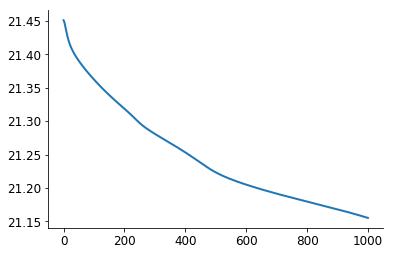

<Figure size 432x288 with 0 Axes>

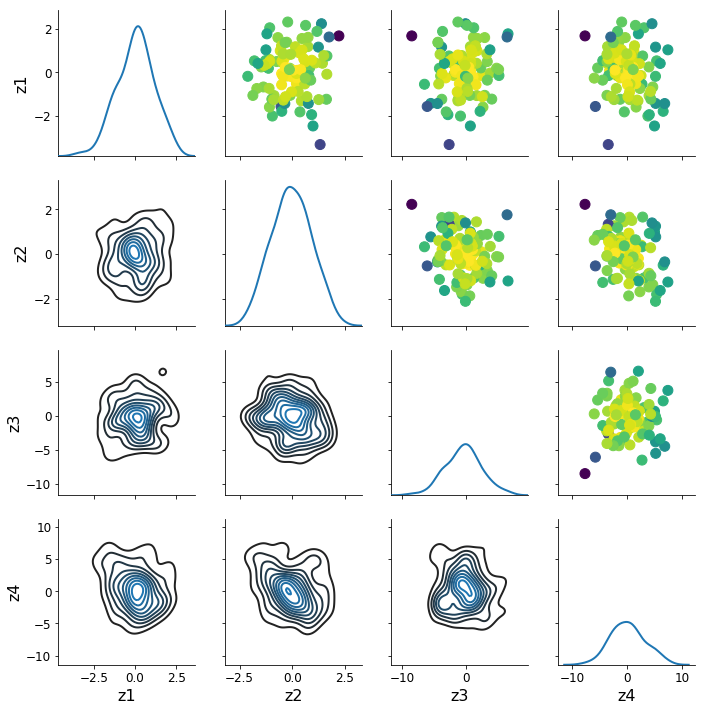

sampling from posterior!
0 loss 232.83492 time 0.03542685508728027
1 loss 232.73035 time 0.03356289863586426
2 loss 232.62721 time 0.03346681594848633
3 loss 232.56175 time 0.037699222564697266
4 loss 232.52449 time 0.034327030181884766
5 loss 232.50302 time 0.03302812576293945
6 loss 232.49 time 0.0336911678314209
7 loss 232.48167 time 0.033126115798950195
8 loss 232.4761 time 0.03366899490356445
9 loss 232.47227 time 0.034342050552368164
10 loss 232.46953 time 0.03664088249206543
11 loss 232.46742 time 0.03548598289489746
12 loss 232.46573 time 0.034269094467163086
13 loss 232.46423 time 0.033605098724365234
14 loss 232.46281 time 0.03241610527038574
15 loss 232.46136 time 0.03434014320373535
16 loss 232.45995 time 0.035877227783203125
17 loss 232.45848 time 0.034120798110961914
18 loss 232.45692 time 0.033516883850097656
19 loss 232.45541 time 0.03751015663146973
20 loss 232.45375 time 0.03391623497009277
21 loss 232.45215 time 0.03552579879760742
22 loss 232.4505 time 0.03573918342

191 loss 232.3384 time 0.040971994400024414
192 loss 232.33408 time 0.03780007362365723
193 loss 232.32916 time 0.037034034729003906
194 loss 232.32356 time 0.03777122497558594
195 loss 232.31712 time 0.03786611557006836
196 loss 232.30968 time 0.0373837947845459
197 loss 232.30109 time 0.04169607162475586
198 loss 232.29102 time 0.03765988349914551
199 loss 232.27919 time 0.03723478317260742
200 loss 232.26514 time 0.03871488571166992
201 loss 232.2484 time 0.03767275810241699
202 loss 232.22821 time 0.03677701950073242
203 loss 232.20364 time 0.041396379470825195
204 loss 232.17352 time 0.0383150577545166
205 loss 232.13617 time 0.0387120246887207
206 loss 232.0894 time 0.037690162658691406
207 loss 232.02994 time 0.03770613670349121
208 loss 231.95328 time 0.037631988525390625
209 loss 231.85275 time 0.039327144622802734
210 loss 231.71791 time 0.03654122352600098
211 loss 231.53194 time 0.04136514663696289
212 loss 231.26599 time 0.0361478328704834
213 loss 230.86635 time 0.0374689

383 loss 177.56456 time 0.04386091232299805
384 loss 177.56416 time 0.04044198989868164
385 loss 177.5637 time 0.038153886795043945
386 loss 177.56328 time 0.039128780364990234
387 loss 177.56282 time 0.03946232795715332
388 loss 177.56241 time 0.04180002212524414
389 loss 177.56197 time 0.0434422492980957
390 loss 177.5615 time 0.03881716728210449
391 loss 177.56107 time 0.037908077239990234
392 loss 177.56062 time 0.03912496566772461
393 loss 177.56017 time 0.03937268257141113
394 loss 177.55972 time 0.04037189483642578
395 loss 177.55927 time 0.042806148529052734
396 loss 177.5588 time 0.039105892181396484
397 loss 177.55835 time 0.03969717025756836
398 loss 177.55788 time 0.03918600082397461
399 loss 177.55742 time 0.0377192497253418
400 loss 177.55695 time 0.03892183303833008
401 loss 177.55647 time 0.042069196701049805
402 loss 177.556 time 0.03977704048156738
403 loss 177.55553 time 0.038967132568359375
404 loss 177.55505 time 0.03951072692871094
405 loss 177.55457 time 0.038844

574 loss 177.01086 time 0.04048275947570801
575 loss 177.00574 time 0.03809309005737305
576 loss 177.00095 time 0.036878108978271484
577 loss 176.99644 time 0.03741121292114258
578 loss 176.9922 time 0.03814387321472168
579 loss 176.9882 time 0.03710603713989258
580 loss 176.98447 time 0.04093813896179199
581 loss 176.9809 time 0.0379793643951416
582 loss 176.97757 time 0.037129878997802734
583 loss 176.97444 time 0.03771495819091797
584 loss 176.97147 time 0.03609514236450195
585 loss 176.96869 time 0.03774690628051758
586 loss 176.96603 time 0.04045391082763672
587 loss 176.96355 time 0.038738250732421875
588 loss 176.96121 time 0.0361940860748291
589 loss 176.95895 time 0.03710579872131348
590 loss 176.95686 time 0.03918790817260742
591 loss 176.95485 time 0.039006948471069336
592 loss 176.95294 time 0.04071974754333496
593 loss 176.95116 time 0.03685712814331055
594 loss 176.94946 time 0.0384061336517334
595 loss 176.94788 time 0.03765702247619629
596 loss 176.94632 time 0.03726220

765 loss 176.88705 time 0.041880130767822266
766 loss 176.8868 time 0.03723287582397461
767 loss 176.88655 time 0.03847026824951172
768 loss 176.88629 time 0.037360191345214844
769 loss 176.88605 time 0.03791379928588867
770 loss 176.8858 time 0.038352012634277344
771 loss 176.88554 time 0.04278087615966797
772 loss 176.8853 time 0.03609132766723633
773 loss 176.88503 time 0.037297725677490234
774 loss 176.88474 time 0.037979841232299805
775 loss 176.88448 time 0.038407325744628906
776 loss 176.88423 time 0.03732609748840332
777 loss 176.88393 time 0.04031991958618164
778 loss 176.88365 time 0.03766798973083496
779 loss 176.88339 time 0.03738093376159668
780 loss 176.88313 time 0.0368959903717041
781 loss 176.88284 time 0.036522865295410156
782 loss 176.88254 time 0.03656888008117676
783 loss 176.8823 time 0.04170703887939453
784 loss 176.88199 time 0.037670135498046875
785 loss 176.88171 time 0.037930965423583984
786 loss 176.88142 time 0.037316083908081055
787 loss 176.88113 time 0.0

951 loss 176.85251 time 0.04337000846862793
952 loss 176.85237 time 0.04205894470214844
953 loss 176.85223 time 0.0385441780090332
954 loss 176.85208 time 0.03873491287231445
955 loss 176.85194 time 0.04004979133605957
956 loss 176.85179 time 0.03915715217590332
957 loss 176.85161 time 0.041480064392089844
958 loss 176.85149 time 0.038559913635253906
959 loss 176.85135 time 0.03890800476074219
960 loss 176.85118 time 0.039147138595581055
961 loss 176.85106 time 0.039235830307006836
962 loss 176.85089 time 0.03833889961242676
963 loss 176.85072 time 0.04350709915161133
964 loss 176.85062 time 0.04003715515136719
965 loss 176.85045 time 0.038533687591552734
966 loss 176.85031 time 0.03943228721618652
967 loss 176.85019 time 0.03990602493286133
968 loss 176.85004 time 0.03823399543762207
969 loss 176.84985 time 0.043283939361572266
970 loss 176.84972 time 0.039283037185668945
971 loss 176.84958 time 0.03833508491516113
972 loss 176.84943 time 0.03903388977050781
973 loss 176.84929 time 0.

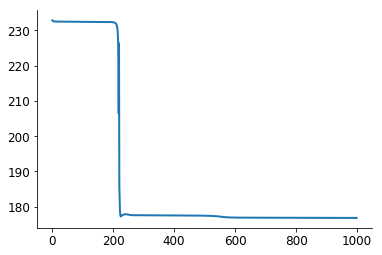

<Figure size 432x288 with 0 Axes>

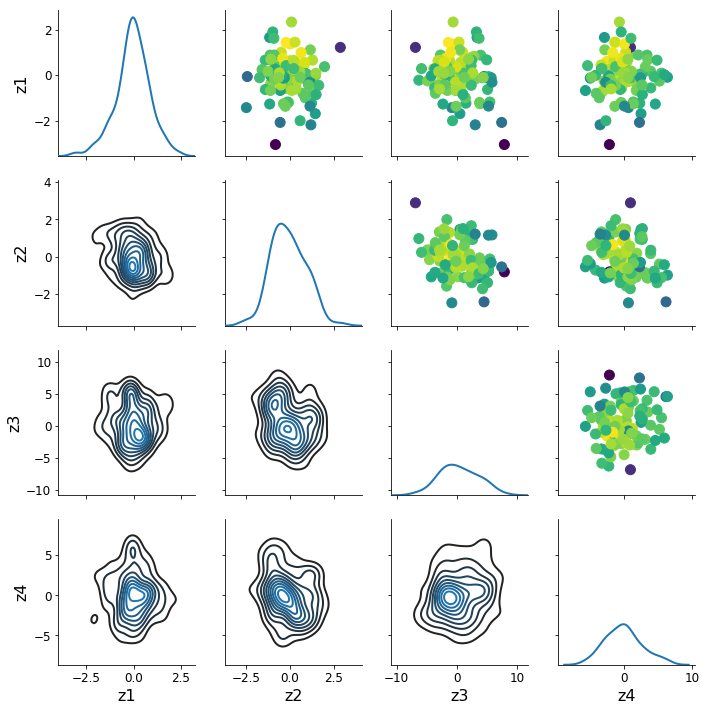

sampling from posterior!
0 loss 38.435883 time 0.03377699851989746
1 loss 38.434933 time 0.03325223922729492
2 loss 38.433018 time 0.03368091583251953
3 loss 38.430172 time 0.03748607635498047
4 loss 38.42639 time 0.03470611572265625
5 loss 38.42159 time 0.033266305923461914
6 loss 38.415573 time 0.03409290313720703
7 loss 38.408005 time 0.0332789421081543
8 loss 38.398243 time 0.0340123176574707
9 loss 38.385128 time 0.03625822067260742
10 loss 38.366425 time 0.03467822074890137
11 loss 38.33737 time 0.03380084037780762
12 loss 38.286552 time 0.0334317684173584
13 loss 38.18182 time 0.03359699249267578
14 loss 37.929535 time 0.03447604179382324
15 loss 37.58097 time 0.03587770462036133
16 loss 37.637287 time 0.03449511528015137
17 loss 37.671654 time 0.03405594825744629
18 loss 37.67776 time 0.03410482406616211
19 loss 37.678802 time 0.03471684455871582
20 loss 37.678883 time 0.03605198860168457
21 loss 37.67875 time 0.03838372230529785
22 loss 37.678555 time 0.03373384475708008
23 lo

195 loss 37.555305 time 0.03975486755371094
196 loss 37.55504 time 0.037876129150390625
197 loss 37.554783 time 0.03550100326538086
198 loss 37.554546 time 0.035640716552734375
199 loss 37.554306 time 0.03614497184753418
200 loss 37.55408 time 0.03543519973754883
201 loss 37.553852 time 0.03881216049194336
202 loss 37.553623 time 0.03671121597290039
203 loss 37.553394 time 0.03568911552429199
204 loss 37.55316 time 0.03621101379394531
205 loss 37.55293 time 0.0356442928314209
206 loss 37.552696 time 0.03625893592834473
207 loss 37.552464 time 0.03832888603210449
208 loss 37.552235 time 0.03624105453491211
209 loss 37.552 time 0.03551077842712402
210 loss 37.551765 time 0.034545183181762695
211 loss 37.55154 time 0.03637504577636719
212 loss 37.551315 time 0.0365300178527832
213 loss 37.551094 time 0.03841590881347656
214 loss 37.55088 time 0.03973817825317383
215 loss 37.550667 time 0.036897897720336914
216 loss 37.550457 time 0.04028725624084473
217 loss 37.550255 time 0.0361707210540

387 loss 37.517895 time 0.04067683219909668
388 loss 37.517715 time 0.03889107704162598
389 loss 37.517544 time 0.03839993476867676
390 loss 37.51737 time 0.03779315948486328
391 loss 37.517197 time 0.036820173263549805
392 loss 37.51702 time 0.03770899772644043
393 loss 37.516853 time 0.04129624366760254
394 loss 37.51668 time 0.03720903396606445
395 loss 37.51651 time 0.03763580322265625
396 loss 37.516342 time 0.03745603561401367
397 loss 37.51618 time 0.03621196746826172
398 loss 37.516006 time 0.03722786903381348
399 loss 37.51584 time 0.04326200485229492
400 loss 37.51568 time 0.038481950759887695
401 loss 37.51551 time 0.037248849868774414
402 loss 37.515347 time 0.037361860275268555
403 loss 37.515182 time 0.03696799278259277
404 loss 37.51502 time 0.03653407096862793
405 loss 37.514854 time 0.0410001277923584
406 loss 37.5147 time 0.03803110122680664
407 loss 37.514538 time 0.03657817840576172
408 loss 37.51438 time 0.03737688064575195
409 loss 37.514225 time 0.037658929824829

579 loss 37.495537 time 0.04166007041931152
580 loss 37.495453 time 0.03714728355407715
581 loss 37.495373 time 0.04018592834472656
582 loss 37.49529 time 0.0378570556640625
583 loss 37.495205 time 0.03806900978088379
584 loss 37.49512 time 0.03705716133117676
585 loss 37.49504 time 0.041818857192993164
586 loss 37.49496 time 0.03748202323913574
587 loss 37.494877 time 0.0368959903717041
588 loss 37.494797 time 0.03847694396972656
589 loss 37.494717 time 0.03769183158874512
590 loss 37.494637 time 0.037075042724609375
591 loss 37.494553 time 0.04080605506896973
592 loss 37.494473 time 0.03757810592651367
593 loss 37.494392 time 0.037296295166015625
594 loss 37.494312 time 0.038050174713134766
595 loss 37.494232 time 0.03794407844543457
596 loss 37.49415 time 0.037068843841552734
597 loss 37.49407 time 0.04033017158508301
598 loss 37.493988 time 0.036596059799194336
599 loss 37.493908 time 0.038175106048583984
600 loss 37.493828 time 0.03773689270019531
601 loss 37.49375 time 0.03757119

771 loss 37.481518 time 0.03355288505554199
772 loss 37.481453 time 0.03685927391052246
773 loss 37.481384 time 0.034184932708740234
774 loss 37.48131 time 0.03387188911437988
775 loss 37.481247 time 0.03382396697998047
776 loss 37.481182 time 0.033815860748291016
777 loss 37.48111 time 0.03615212440490723
778 loss 37.48104 time 0.036377668380737305
779 loss 37.480972 time 0.035284996032714844
780 loss 37.4809 time 0.03602313995361328
781 loss 37.48083 time 0.035299062728881836
782 loss 37.480762 time 0.036568641662597656
783 loss 37.48069 time 0.038372039794921875
784 loss 37.48062 time 0.03684091567993164
785 loss 37.480553 time 0.035787105560302734
786 loss 37.48048 time 0.035546064376831055
787 loss 37.48041 time 0.03542017936706543
788 loss 37.480347 time 0.0352020263671875
789 loss 37.480278 time 0.03827095031738281
790 loss 37.480206 time 0.03727293014526367
791 loss 37.480137 time 0.036041975021362305
792 loss 37.48007 time 0.03640604019165039
793 loss 37.48 time 0.038065195083

963 loss 37.456547 time 0.039292097091674805
964 loss 37.45591 time 0.03745317459106445
965 loss 37.455246 time 0.03621673583984375
966 loss 37.45454 time 0.0355379581451416
967 loss 37.4538 time 0.03592991828918457
968 loss 37.45302 time 0.035243988037109375
969 loss 37.452187 time 0.036689043045043945
970 loss 37.451313 time 0.03754997253417969
971 loss 37.45038 time 0.036010026931762695
972 loss 37.44939 time 0.03546500205993652
973 loss 37.448338 time 0.03548598289489746
974 loss 37.44721 time 0.035875797271728516
975 loss 37.446007 time 0.037754058837890625
976 loss 37.44471 time 0.038057804107666016
977 loss 37.443314 time 0.035421133041381836
978 loss 37.441807 time 0.03589224815368652
979 loss 37.44017 time 0.03551840782165527
980 loss 37.438385 time 0.0353391170501709
981 loss 37.43643 time 0.03878378868103027
982 loss 37.43428 time 0.036802053451538086
983 loss 37.431923 time 0.03976798057556152
984 loss 37.429325 time 0.0352628231048584
985 loss 37.426464 time 0.035178899765

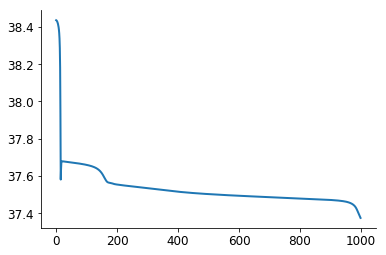

<Figure size 432x288 with 0 Axes>

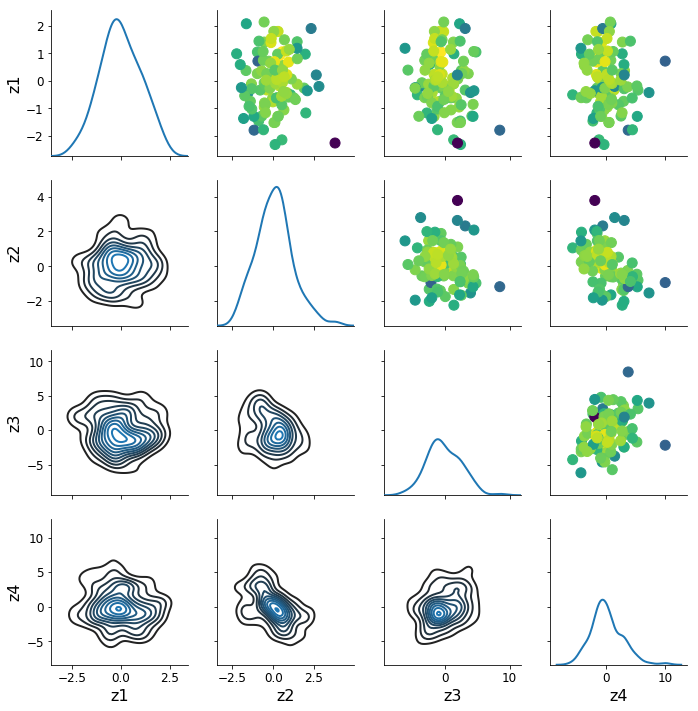

sampling from posterior!
0 loss 362.69458 time 0.03500509262084961
1 loss 176.62459 time 0.03305315971374512
2 loss 176.3382 time 0.0335390567779541
3 loss 176.37874 time 0.03940582275390625
4 loss 176.53 time 0.03472590446472168
5 loss 176.6782 time 0.0346529483795166
6 loss 176.70259 time 0.03349018096923828
7 loss 176.57712 time 0.033596038818359375
8 loss 176.38525 time 0.03519320487976074
9 loss 176.26035 time 0.035421133041381836
10 loss 176.24524 time 0.033596038818359375
11 loss 176.2843 time 0.03294110298156738
12 loss 176.32806 time 0.03313279151916504
13 loss 176.35928 time 0.03300786018371582
14 loss 176.376 time 0.035668134689331055
15 loss 176.37979 time 0.03654599189758301
16 loss 176.37207 time 0.03406381607055664
17 loss 176.35356 time 0.03307199478149414
18 loss 176.3248 time 0.0346372127532959
19 loss 176.28766 time 0.033411264419555664
20 loss 176.24808 time 0.03521609306335449
21 loss 176.219 time 0.03558611869812012
22 loss 176.21584 time 0.033686161041259766
23 l

191 loss 176.15276 time 0.03377699851989746
192 loss 176.15271 time 0.039086103439331055
193 loss 176.15266 time 0.03433513641357422
194 loss 176.15265 time 0.034104108810424805
195 loss 176.15262 time 0.03293204307556152
196 loss 176.15257 time 0.03340792655944824
197 loss 176.15254 time 0.03499484062194824
198 loss 176.1525 time 0.03497791290283203
199 loss 176.15247 time 0.03358888626098633
200 loss 176.15244 time 0.03378915786743164
201 loss 176.1524 time 0.03365182876586914
202 loss 176.15237 time 0.03401494026184082
203 loss 176.15234 time 0.03399491310119629
204 loss 176.15231 time 0.03589296340942383
205 loss 176.15228 time 0.03720498085021973
206 loss 176.15224 time 0.03400778770446777
207 loss 176.1522 time 0.03482484817504883
208 loss 176.15218 time 0.03393673896789551
209 loss 176.15213 time 0.03548717498779297
210 loss 176.1521 time 0.03573107719421387
211 loss 176.15207 time 0.03312397003173828
212 loss 176.15204 time 0.03371405601501465
213 loss 176.152 time 0.0335800647

381 loss 176.14476 time 0.03759479522705078
382 loss 176.1447 time 0.03861498832702637
383 loss 176.14464 time 0.036685943603515625
384 loss 176.14458 time 0.03806114196777344
385 loss 176.1445 time 0.036737918853759766
386 loss 176.14444 time 0.03593325614929199
387 loss 176.14438 time 0.0391998291015625
388 loss 176.1443 time 0.036917924880981445
389 loss 176.14426 time 0.03620314598083496
390 loss 176.1442 time 0.037835121154785156
391 loss 176.1441 time 0.03526496887207031
392 loss 176.14404 time 0.03502988815307617
393 loss 176.144 time 0.03885698318481445
394 loss 176.14392 time 0.04227304458618164
395 loss 176.14386 time 0.039598941802978516
396 loss 176.1438 time 0.03662919998168945
397 loss 176.14374 time 0.0354459285736084
398 loss 176.14366 time 0.03774714469909668
399 loss 176.1436 time 0.0380549430847168
400 loss 176.14352 time 0.033670902252197266
401 loss 176.14346 time 0.03661394119262695
402 loss 176.1434 time 0.03580784797668457
403 loss 176.14333 time 0.0359878540039

570 loss 176.13374 time 0.04347801208496094
571 loss 176.1337 time 0.041853904724121094
572 loss 176.13367 time 0.04010176658630371
573 loss 176.13364 time 0.0454561710357666
574 loss 176.1336 time 0.04080939292907715
575 loss 176.13358 time 0.04069018363952637
576 loss 176.13354 time 0.043665170669555664
577 loss 176.13351 time 0.04097604751586914
578 loss 176.13347 time 0.04000520706176758
579 loss 176.13345 time 0.03855490684509277
580 loss 176.13342 time 0.04153776168823242
581 loss 176.13338 time 0.04434394836425781
582 loss 176.13336 time 0.04291510581970215
583 loss 176.13333 time 0.041381120681762695
584 loss 176.1333 time 0.03947710990905762
585 loss 176.13327 time 0.04091000556945801
586 loss 176.13324 time 0.04063081741333008
587 loss 176.13321 time 0.04157519340515137
588 loss 176.13318 time 0.04161667823791504
589 loss 176.13312 time 0.04209589958190918
590 loss 176.13312 time 0.04135727882385254
591 loss 176.13309 time 0.04576992988586426
592 loss 176.13306 time 0.0403358

759 loss 176.12936 time 0.03941202163696289
760 loss 176.12935 time 0.03660726547241211
761 loss 176.12933 time 0.03551506996154785
762 loss 176.12932 time 0.03564596176147461
763 loss 176.1293 time 0.03632521629333496
764 loss 176.12929 time 0.03648805618286133
765 loss 176.12927 time 0.03836321830749512
766 loss 176.12924 time 0.036978960037231445
767 loss 176.12924 time 0.03630399703979492
768 loss 176.12923 time 0.03538703918457031
769 loss 176.12921 time 0.03524613380432129
770 loss 176.1292 time 0.0349271297454834
771 loss 176.12918 time 0.0373687744140625
772 loss 176.12915 time 0.03710794448852539
773 loss 176.12915 time 0.03564810752868652
774 loss 176.12912 time 0.038691043853759766
775 loss 176.1291 time 0.03644895553588867
776 loss 176.12909 time 0.0362548828125
777 loss 176.12907 time 0.03769397735595703
778 loss 176.12906 time 0.03643012046813965
779 loss 176.12904 time 0.038954973220825195
780 loss 176.12903 time 0.03584003448486328
781 loss 176.12901 time 0.035619974136

946 loss 176.12659 time 0.04074287414550781
947 loss 176.12659 time 0.04088902473449707
948 loss 176.12656 time 0.04111790657043457
949 loss 176.12656 time 0.03839111328125
950 loss 176.12654 time 0.03938007354736328
951 loss 176.12653 time 0.038613080978393555
952 loss 176.12651 time 0.04197883605957031
953 loss 176.1265 time 0.03908085823059082
954 loss 176.1265 time 0.038995981216430664
955 loss 176.12646 time 0.03831315040588379
956 loss 176.12646 time 0.039372920989990234
957 loss 176.12645 time 0.04044508934020996
958 loss 176.12643 time 0.040827035903930664
959 loss 176.12642 time 0.04118609428405762
960 loss 176.12639 time 0.0385441780090332
961 loss 176.1264 time 0.03958892822265625
962 loss 176.12637 time 0.039762020111083984
963 loss 176.12636 time 0.038858890533447266
964 loss 176.12636 time 0.04118704795837402
965 loss 176.12634 time 0.036720991134643555
966 loss 176.12631 time 0.03583836555480957
967 loss 176.12631 time 0.036038875579833984
968 loss 176.12628 time 0.03723

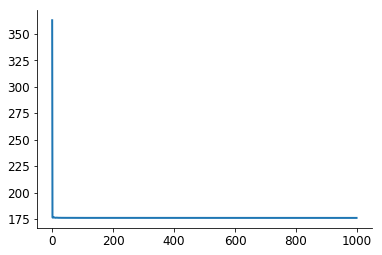

<Figure size 432x288 with 0 Axes>

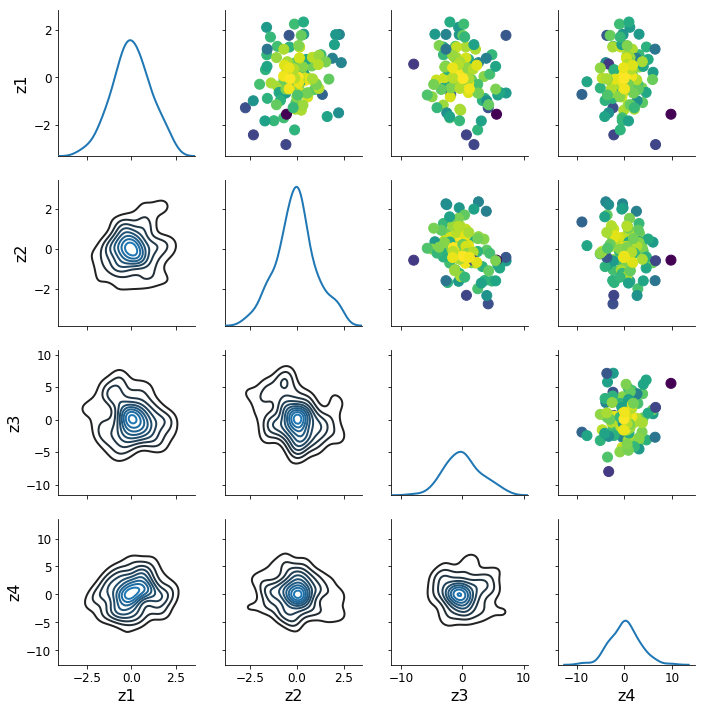

sampling from posterior!
0 loss 69.93265 time 0.04056072235107422
1 loss 69.93259 time 0.03817319869995117
2 loss 69.932495 time 0.03864288330078125
3 loss 69.932365 time 0.03443574905395508
4 loss 69.932205 time 0.034523963928222656
5 loss 69.93201 time 0.03531789779663086
6 loss 69.931786 time 0.03428196907043457
7 loss 69.93154 time 0.039259910583496094
8 loss 69.93129 time 0.03983497619628906
9 loss 69.93103 time 0.03962302207946777
10 loss 69.930756 time 0.03857612609863281
11 loss 69.93048 time 0.038728952407836914
12 loss 69.93021 time 0.03829026222229004
13 loss 69.929924 time 0.03782796859741211
14 loss 69.929665 time 0.040370941162109375
15 loss 69.9294 time 0.037857770919799805
16 loss 69.92914 time 0.037819862365722656
17 loss 69.92889 time 0.03728008270263672
18 loss 69.92866 time 0.03533315658569336
19 loss 69.92845 time 0.037711143493652344
20 loss 69.92824 time 0.039010047912597656
21 loss 69.92805 time 0.04127907752990723
22 loss 69.92786 time 0.038883209228515625
23 l

193 loss 69.91892 time 0.03912973403930664
194 loss 69.91888 time 0.04056572914123535
195 loss 69.91883 time 0.04036092758178711
196 loss 69.918785 time 0.03978705406188965
197 loss 69.91874 time 0.04062700271606445
198 loss 69.91869 time 0.03961586952209473
199 loss 69.91865 time 0.04180097579956055
200 loss 69.9186 time 0.03900790214538574
201 loss 69.91856 time 0.039758920669555664
202 loss 69.9185 time 0.03544878959655762
203 loss 69.918465 time 0.03888988494873047
204 loss 69.91842 time 0.04001212120056152
205 loss 69.91837 time 0.039190053939819336
206 loss 69.91833 time 0.03819608688354492
207 loss 69.91828 time 0.03711724281311035
208 loss 69.918236 time 0.038516998291015625
209 loss 69.91819 time 0.038832902908325195
210 loss 69.918144 time 0.04082894325256348
211 loss 69.9181 time 0.03642392158508301
212 loss 69.918045 time 0.03792214393615723
213 loss 69.91801 time 0.03896903991699219
214 loss 69.91795 time 0.04062223434448242
215 loss 69.917915 time 0.04224085807800293
216 

384 loss 69.90983 time 0.03421616554260254
385 loss 69.90979 time 0.03679609298706055
386 loss 69.90975 time 0.034770965576171875
387 loss 69.909706 time 0.03600001335144043
388 loss 69.90967 time 0.03503990173339844
389 loss 69.90964 time 0.03466296195983887
390 loss 69.9096 time 0.03910517692565918
391 loss 69.90955 time 0.03967094421386719
392 loss 69.909515 time 0.03989601135253906
393 loss 69.90948 time 0.03896498680114746
394 loss 69.90943 time 0.0393061637878418
395 loss 69.9094 time 0.038654327392578125
396 loss 69.909355 time 0.03876376152038574
397 loss 69.90932 time 0.039041996002197266
398 loss 69.90928 time 0.03900599479675293
399 loss 69.90924 time 0.038780927658081055
400 loss 69.9092 time 0.04004502296447754
401 loss 69.909164 time 0.038436174392700195
402 loss 69.90913 time 0.04004693031311035
403 loss 69.90909 time 0.040112972259521484
404 loss 69.90906 time 0.03980898857116699
405 loss 69.90901 time 0.03859829902648926
406 loss 69.90898 time 0.039732933044433594
407 

578 loss 69.902664 time 0.035259246826171875
579 loss 69.90262 time 0.03463292121887207
580 loss 69.90257 time 0.03426098823547363
581 loss 69.90252 time 0.03357267379760742
582 loss 69.90247 time 0.03473711013793945
583 loss 69.90243 time 0.03309273719787598
584 loss 69.902374 time 0.0372769832611084
585 loss 69.90233 time 0.036422014236450195
586 loss 69.90228 time 0.037420034408569336
587 loss 69.90223 time 0.03629469871520996
588 loss 69.902176 time 0.03686714172363281
589 loss 69.90214 time 0.03482389450073242
590 loss 69.90209 time 0.03839707374572754
591 loss 69.90203 time 0.03935885429382324
592 loss 69.901985 time 0.03952383995056152
593 loss 69.90193 time 0.03877377510070801
594 loss 69.90188 time 0.04183602333068848
595 loss 69.901825 time 0.043886661529541016
596 loss 69.90177 time 0.04185295104980469
597 loss 69.90172 time 0.042758941650390625
598 loss 69.901665 time 0.039700984954833984
599 loss 69.90161 time 0.04218697547912598
600 loss 69.90155 time 0.03945803642272949


768 loss 69.80772 time 0.03845667839050293
769 loss 69.80741 time 0.040763139724731445
770 loss 69.807106 time 0.038549184799194336
771 loss 69.80677 time 0.03725838661193848
772 loss 69.80641 time 0.03912806510925293
773 loss 69.806015 time 0.04278922080993652
774 loss 69.80557 time 0.04111814498901367
775 loss 69.80507 time 0.037322282791137695
776 loss 69.80455 time 0.03590583801269531
777 loss 69.80399 time 0.03792405128479004
778 loss 69.8034 time 0.03702092170715332
779 loss 69.802826 time 0.035468101501464844
780 loss 69.80224 time 0.039994239807128906
781 loss 69.80167 time 0.0379638671875
782 loss 69.80111 time 0.035627126693725586
783 loss 69.80058 time 0.03728485107421875
784 loss 69.800095 time 0.03885912895202637
785 loss 69.79962 time 0.035807132720947266
786 loss 69.79918 time 0.037101030349731445
787 loss 69.798775 time 0.03789067268371582
788 loss 69.79839 time 0.03448295593261719
789 loss 69.79803 time 0.035079002380371094
790 loss 69.7977 time 0.03534126281738281
791

962 loss 69.72981 time 0.04406905174255371
963 loss 69.72969 time 0.03868389129638672
964 loss 69.72957 time 0.03990602493286133
965 loss 69.72945 time 0.03701305389404297
966 loss 69.72932 time 0.038134098052978516
967 loss 69.72919 time 0.03746318817138672
968 loss 69.72906 time 0.04081988334655762
969 loss 69.72893 time 0.037055015563964844
970 loss 69.7288 time 0.03699302673339844
971 loss 69.728676 time 0.03587508201599121
972 loss 69.728546 time 0.03577899932861328
973 loss 69.72841 time 0.03533601760864258
974 loss 69.72827 time 0.0371708869934082
975 loss 69.72814 time 0.038640737533569336
976 loss 69.728004 time 0.036742210388183594
977 loss 69.72788 time 0.03497600555419922
978 loss 69.72774 time 0.03549909591674805
979 loss 69.72761 time 0.036270856857299805
980 loss 69.72746 time 0.0373380184173584
981 loss 69.72732 time 0.036583900451660156
982 loss 69.72718 time 0.03334403038024902
983 loss 69.727036 time 0.03803515434265137
984 loss 69.7269 time 0.036852121353149414
985 

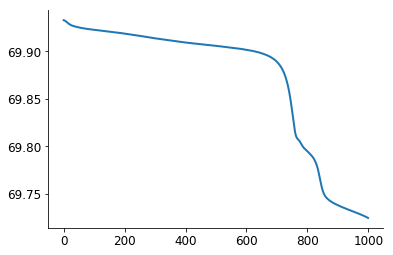

<Figure size 432x288 with 0 Axes>

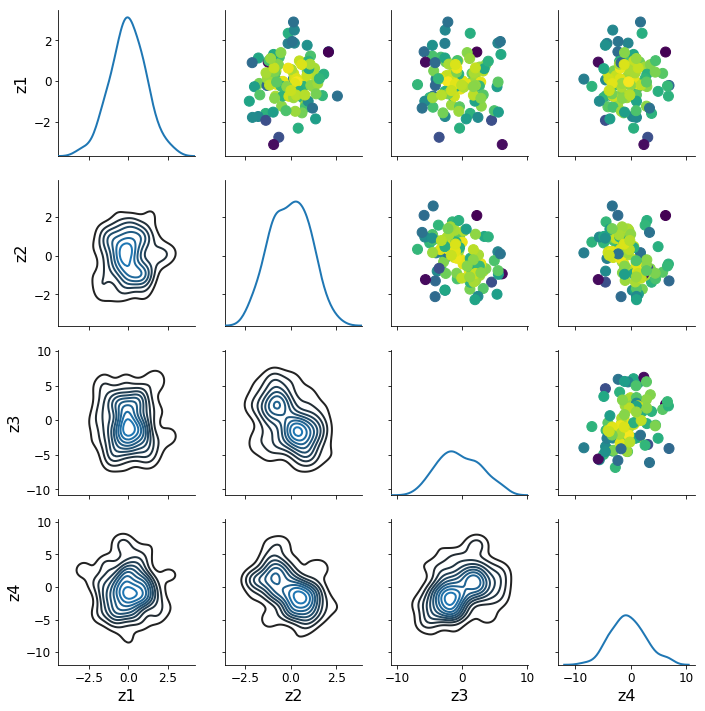

In [5]:
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
N_steps = 100

@tf.function
def train_step(theta, x, w):
    with tf.GradientTape(persistent=True) as tape:
        log_ps = []
        for i in range(N_theta):
            log_ps.append(w[i]*nf.log_prob(theta[i], x_data=x[i]))
            loss = -tf.reduce_sum(log_ps)
    params = nf.trainable_variables
    grads = tape.gradient(loss, params)
    optimizer.apply_gradients(zip(grads, params))
    return loss

R = 4
for r in range(1, R+1):
    theta_r, p_theta_r = SNPE_sample_prior(r, N_theta, nf, x0_tf)
    x_r = []
    w = (1./(10.**4)) / p_theta_r
    
    for i in range(N_theta):
        x_ri = linear2D_eig_stochastic(theta_r[i], sigma, N)
        x_ri_tf = x_tf_input(x_ri)
        x_r.append(x_ri_tf)
    
    losses = []
    for j in range(N_steps):
        _time = time.time()
        losses.append(train_step(theta_r, x_r, w).numpy())
        print(j, 'loss', losses[-1], 'time', time.time()-_time)
    
    plt.figure()
    plt.plot(losses)
    plt.show()

    plt.figure()
    nf.plot_dist(N=100, x_data=x0_tf)
    plt.show()